In [18]:
%load_ext line_profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
import sklearn.linear_model as lm
import src.random_matrix as rm
import src.stat_arb as sa
import src.dim_reduction as dr
import statsmodels.api as sm
import math
import importlib

PATH = '/data/hawfinch/clarkson/data/us_eq/cache'

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

df = df.dropna(thresh=len(df)*.99, axis=1)
df = df.dropna(axis=0)
spy = df['SPY']
df = df.drop('SPY', axis=1)

df_excess = df.apply(lambda x: x - spy)
df_excess

ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,ZBRA,ZEUS,ZION,ZIXI,PKG,SNH,UTSI,SLAB,EPC,EW
date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,0.012937,-0.097531,-0.029607,-0.024211,0.003142,-0.001034,-0.048365,-0.046907,0.028059,-0.048287,...,-0.020812,-0.063554,-0.006948,-0.058037,-0.001034,0.023967,-0.062150,0.043571,-0.001034,-0.004932
2000-03-30,0.009640,-0.026769,0.045454,-0.061019,-0.017021,0.023111,0.014326,-0.125017,0.034643,-0.049811,...,-0.019996,0.048629,-0.014039,-0.151571,0.016881,0.016881,0.006961,-0.074411,-0.004397,-0.022965
2000-03-31,-0.031043,-0.000284,-0.021905,0.065694,0.022616,-0.011285,-0.050404,0.049146,-0.020127,0.022616,...,0.024342,-0.011285,0.071639,-0.049185,0.056433,0.000985,-0.054379,0.029066,-0.013977,-0.136720
2000-04-03,0.012837,-0.073701,-0.009367,-0.024381,-0.031120,-0.012033,0.010030,-0.062960,0.044425,-0.188123,...,-0.047927,-0.037551,-0.045623,-0.134806,-0.023820,-0.018072,-0.121985,-0.195780,-0.093058,0.007928
2000-04-04,-0.007191,0.051748,0.021651,-0.038586,0.069598,0.032158,-0.027158,-0.015676,0.071265,0.189787,...,-0.004338,0.007466,0.047287,-0.144084,-0.017075,0.019736,-0.224258,0.058247,0.010403,0.025484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,-0.012916,-0.028874,-0.002189,0.000788,0.008289,-0.000994,-0.006112,0.000133,-0.001772,0.011358,...,-0.052587,0.007190,-0.003881,-0.024252,0.001747,-0.003378,0.009521,-0.021766,-0.024588,-0.016469
2019-05-20,-0.014402,-0.048323,0.024551,-0.025135,0.025748,0.006356,-0.003721,-0.024164,0.003998,0.002372,...,-0.026571,-0.011103,0.002190,0.033038,-0.040407,-0.013392,-0.017907,-0.026555,0.000679,0.004668
2019-05-21,0.021809,0.005509,0.015957,0.010014,0.007796,0.001815,0.001643,0.021285,-0.005550,0.010660,...,0.018463,0.031704,0.010434,-0.001404,0.014452,-0.003931,-0.021475,0.023794,0.004142,-0.013500


Registered Pca_60
Registered SPca_60
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000


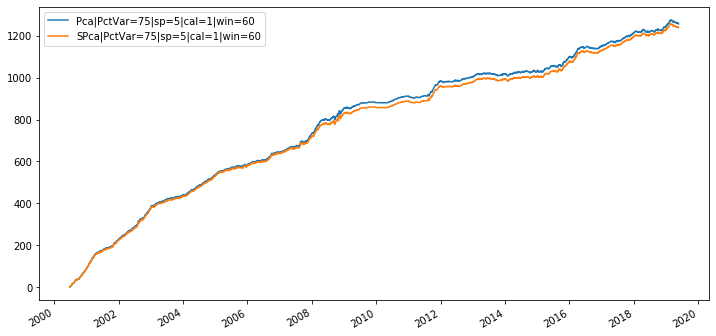

Timer unit: 1e-06 s

Total time: 317.124 s
File: /homes/clarkson/PycharmProjects/mini_1/src/stat_arb.py
Function: calibrate_portfolio at line 114

Line #      Hits         Time  Per Hit   % Time  Line Contents
   114                                               def calibrate_portfolio(self, data, date, transforms=None):
   115                                                   """ Calibrate the portfolio (from T-N,...,T-1) and return weights for time T"""        
   116      9626     250781.0     26.1      0.1          if date in self.cal_dates:
   117      9624     109009.0     11.3      0.0              ix = data.index.get_loc(date)
   118      9624      38023.0      4.0      0.0              if len(data) - ix < self.forecast_horizon or ix < self.window_len:
   119       118         53.0      0.4      0.0                  return
   120                                                       # NOTE: iloc slice doesn't include ix (so no lookahead).
   121      9506    3057203.0    321.6 

In [33]:
importlib.reload(dr)
importlib.reload(sa)

# def fit_tfms(self, strats):
    
def backtest(df_lr, strats, df_exc=None, benchmark=None):    
    i = 0
    tfmrs = sa.Transforms()
    for strat in strats:
        strat.register_transforms(tfmrs)
        strat.setup(df_lr)
    for index, row in df_lr.iterrows():
        for strat in strats:
            strat.calibrate_portfolio(df_lr, index, tfmrs)
        i += 1
        if i % 1000 == 0: print('Iteration: {}'.format(i))

    for strat in strats:
        strat.pnl_reconciliation(df_lr)
    rets = [strat.cum_ret for strat in strats]
    pd.concat(rets, axis=1).plot(figsize=(12, 6))
#     if benchmark is not None:
#         (benchmark / benchmark.ewm(span=252).std().shift(1)).cumsum().plot(label='vn_spy')
#         benchmark.cumsum().plot(label='spy')
# strats = [sa.StArbFm(dr.Pca(pct_var=50), cal_freq=1, window_len=60)]
strats = [sa.StArbFm(dr.Pca(pct_var=75), cal_freq=1, window_len=60), 
#           sa.StArbFm(dr.Pca(pct_var=50), cal_freq=1), \
#           sa.StArbFm(dr.SPca(pct_var=75), cal_freq=60), \
        sa.StArbFm(dr.SPca(pct_var=75), cal_freq=1)]

# backtest(df, strats, df_excess, benchmark=spy)
%lprun -f sa.StArbFm.calibrate_portfolio backtest(df, strats, df_excess, benchmark=spy)

Registered Pca_60
Registered SPca_60
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000


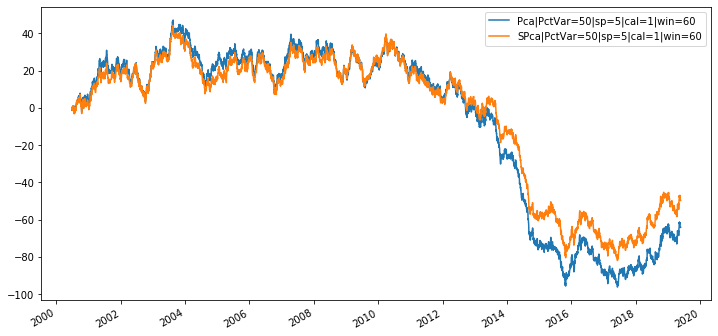

In [29]:
rand = pd.DataFrame(np.random.normal(size=df.shape), index=df.index, columns=df.columns)
backtest(rand, strats, df_excess, benchmark=spy)

In [21]:
# def bt(df_lr, df_exc=None, benchmark=None):
#     pca = PCA(n_components=0.50)
#     returns = np.zeros(len(df_lr))
#     i = 0
#     for index, row in df_lr.iloc[60:].iterrows():
#         ix = df_lr.index.get_loc(index)
#         window = df_lr.iloc[ix-60:ix]
#         fr = pca.fit_transform(window)
#         models = lm.LinearRegression(fit_intercept=False).fit(fr, window)
#         weights = -(window - models.predict(fr)).ewm(span=5).mean().iloc[-1]
#         returns[i] = weights.values.dot(row.values)
#         if i % 500 == 0: print(i)
#         i+= 1
#     return returns
# r = bt(df, df_excess, benchmark=spy)
from scipy import stats

def thresh_vec(factor):
    th = stats.median_absolute_deviation(factor) / 0.6745
    factor[np.abs(factor) > th] = 0
    return factor
#         factors = np.array([thresh_vec(factor) for factor in pca.components_])

def bt(df_lr, df_exc=None, benchmark=None):
    scaler = StandardScaler()
    pca = PCA(n_components=0.50)
    corr_pca = Pipeline([('s', scaler), ('pca', pca)])
    returns = np.zeros(len(df_lr))
    i = 0
    for index, row in df_lr.iloc[60:].iterrows():
        ix = df_lr.index.get_loc(index)
        window = df_lr.iloc[ix-60:ix]
        win_cen = pd.DataFrame(scale(window, with_mean=True, with_std=False),
                               index=window.index, columns=window.columns.values)
        fr = pca.fit_transform(win_cen)
#         fr = np.matmul(window.values, pca.components_.T)
        models = lm.LinearRegression(fit_intercept=False).fit(fr, win_cen)
        weights = -1 * (win_cen - models.predict(fr)).ewm(span=5).mean().iloc[-1]
        returns[i] = weights.values.dot(row.values)
        if i % 500 == 0: print(i)
        i+= 1
    print('i: {} | len(returns): {}'.format(i, len(returns)))
    return returns[:i]
rsp = bt(df, df_excess, benchmark=spy)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
i: 4753 | len(returns): 4813


[0    3.82
dtype: float64, array([0.])]


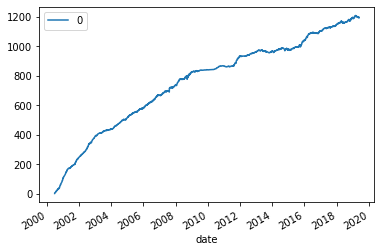

In [24]:
rsp = pd.DataFrame(rsp, index=df.iloc[60:].index)
rsp_daily = (rsp / rsp.ewm(span=252).std().shift(1))
rsp_daily.cumsum().plot()
print(sharpe_ratio_test(rsp_daily))

In [11]:
window = df.iloc[:60]
%timeit window - window.mean()
%timeit preprocessing.scale(window, with_mean=True, with_std=False)

164 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.29 ms ± 5.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


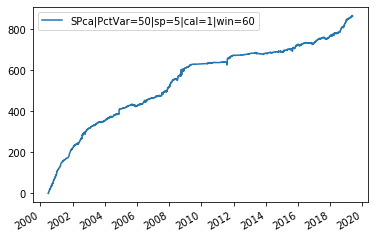

In [36]:
# print(strats[0].lr)
# print(rsp_daily)
strats[0].cum_ret.plot()

In [85]:
rets = [strat.cum_ret for strat in strats]
pd.concat(rets, axis=1)
# pd.concat(rets, axis=1).plot(figsize=(12, 6))


,Pca|PctVar=75|sp=5|cal=60|win=60,Pca|PctVar=90|sp=5|cal=60|win=60,SPca|PctVar=75|sp=5|cal=60|win=60
2000-06-23,NaN,NaN,NaN
2000-06-26,NaN,NaN,NaN
2000-06-27,-5.978035,-0.737557,-2.052474
2000-06-28,-6.025695,0.600843,-3.718781
2000-06-29,-6.503556,2.148741,-3.501033
...,...,...,...
2019-05-17,-45.378733,-48.363052,28.117155
2019-05-20,-44.947746,-48.114988,28.973585
2019-05-21,-43.169897,-48.125449,29.493378
2019-05-22,-44.493687,-48.183828,29.304972


In [23]:
from scipy.stats import norm

def sharpe_ratio_test(log_ret):
    '''
    Implements the sharpe ratio test ion Opdyke 2007
    :param log_ret: daily log-returns
    :return: annualised sharpe ratio and p-value
    '''
    sharpe = log_ret.mean()/log_ret.std()
    sharpe_annualised = sharpe * np.sqrt(252)    
    T = len(log_ret)
    std = log_ret.std()
    skew = ((log_ret - log_ret.mean()) ** 3).mean()
    kurtosis = ((log_ret - log_ret.mean()) ** 4).mean()    
    sharpe_se = np.sqrt((1 + sharpe ** 2/ 4 * (kurtosis - 1) - sharpe * skew) / T)    
    p_value = 1 - norm.cdf(sharpe/sharpe_se)    
    return [sharpe_annualised.round(2), p_value]

In [33]:
for strat in strats:
    print(sharpe_ratio_test(strat.lr))

# print(sharpe_ratio_test(strats[2].vn_rets))
# print(sharpe_ratio_test(spy))

[Pca|PctVar=75|sp=5|cal=60|win=60   -0.15
dtype: float64, array([0.73662873])]
[Pca|PctVar=90|sp=5|cal=60|win=60   -0.16
dtype: float64, array([0.7545739])]
[Pca|PctVar=50|sp=5|cal=1|win=60    3.4
dtype: float64, array([0.])]
[SPca|PctVar=75|sp=5|cal=60|win=60    0.1
dtype: float64, array([0.33538633])]
[SPca|PctVar=50|sp=5|cal=1|win=60    2.51
dtype: float64, array([0.])]


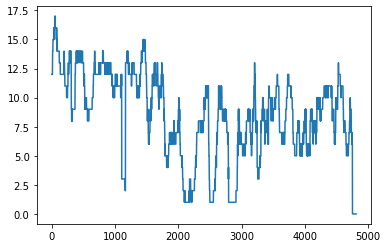

In [25]:
# print(strats[0].n_pcs.var())
plt.plot(strats[0].n_pcs)
# pd.concat([spy.loc[strats[0].vn_rets.index], strats[0].vn_rets['log_return']], axis=1)
# print(np.corrcoef(strats[0].vn_rets.values.T, spy.loc[strats[0].vn_rets.index].values))
# print(strats[0].vn_rets.values.T)

In [104]:
importlib.reload(dr)
spca = dr.SPca(pct_var=75)
pca = dr.Pca(pct_var=75)
data = df.iloc[:100]
pca.fit(data)
print(pca.get_factors()[0])
spca.fit(data)
print('sparse')
print(spca.get_factors()[0])
# spca.estimate_factors(data)

[-0.01521198 -0.05354153 -0.01965429 ... -0.03672036 -0.01219487
 -0.01426798]
sparse
[-0.01521198  0.         -0.01965429 ...  0.         -0.01219487
 -0.01426798]
